# NAT Baseline

In [84]:
!activate sak
!pip install sklearn pints numpy pandas sklearn

from __future__ import print_function
import warnings
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

%matplotlib inline


(sak) c:\Users\sakib\OneDrive - University of Edinburgh\Year 4\Natural Computing\NAT-CW2>conda.bat activate sak 


In [85]:
# generate the twospirals data

def twospirals(n_points, noise=.0, square=False, sine=False):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt( np.random.rand(n_points,1) ) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise

    d1 = (d1x, d1y)
    negd1 = (-d1x, -d1y)

    if sine: 
        sinx1, sinx2 = np.sin(d1x), np.sin(d1y)
        d1 += (sinx1, sinx2)
        negd1 += (-sinx1, -sinx2)

    if square:
        sqx1, sqx2 = d1x*d1x, d1y*d1y
        d1 += (sqx1, sqx2)
        negd1 += (-sqx1, -sqx2)

    x1 = np.hstack(d1)
    x2 = np.hstack(negd1)

    x = np.vstack( (x1, x2) )
    y = np.hstack( ( np.zeros(n_points), np.ones(n_points) ) )
    return (x, y)
    # (np.vstack( ( np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)) ) ), np.hstack((np.zeros(n_points),np.ones(n_points))))

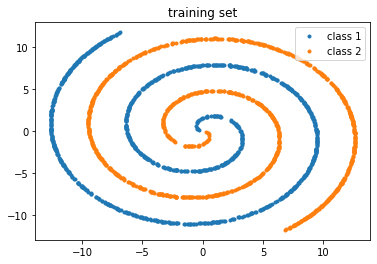

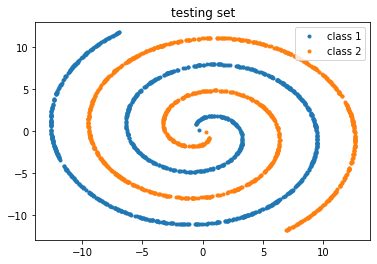

In [86]:
X_train, y_train = twospirals(n_points=1000)
X_test, y_test = twospirals(n_points=1000)

plt.title('training set')
plt.plot(X_train[y_train==0,0], X_train[y_train==0,1], '.', label='class 1')
plt.plot(X_train[y_train==1,0], X_train[y_train==1,1], '.', label='class 2')
plt.legend()
plt.show()

plt.title('testing set')
plt.plot(X_test[y_test==0,0], X_test[y_test==0,1], '.', label='class 1')
plt.plot(X_test[y_test==1,0], X_test[y_test==1,1], '.', label='class 2')
plt.legend()
plt.show()

In [87]:
param_grid = [{'activation' : ['identity', 'logistic', 'tanh', 'relu'],
                'solver' : ['lbfgs', 'sgd', 'adam'],
                'hidden_layer_sizes': [(4,), (5,), (6,), (7,), (8,)]}]

neurons_to_test = param_grid[0]['hidden_layer_sizes']

num_training_iter = 3 

In [88]:
# TEST: LINEAR FEATURES (X, Y)

# generate twospirals
X_train, y_train = twospirals(n_points=1000)
X_test, y_test = twospirals(n_points=1000)

# grid search to find best params for given features
with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=ConvergenceWarning, module='sklearn')
    gridsearch = GridSearchCV(MLPClassifier(), param_grid, cv=3, scoring='accuracy', verbose=0)
    gridsearch.fit(X_train, y_train)
    print(f'best params w/ LINEAR FEATURES (X, Y) (e.g. {X_train[0]}): {gridsearch.best_params_}')

# vary no. of neurons, n w/ best params found ^ 
for n in neurons_to_test:
    best_activation = gridsearch.best_params_['activation']
    best_solver = gridsearch.best_params_['solver']
    clf = MLPClassifier(max_iter=num_training_iter, hidden_layer_sizes=n, activation=best_activation, solver=best_solver)
    clf.fit(X_train, y_train)
    print(f'neurons: {n[0]} \t\ttrain acc: {clf.score(X_train, y_train)} \t\ttest acc: {clf.score(X_test, y_test)} \t\tmse: {mean_squared_error(y_test, clf.predict(X_test))}')

best params w/ LINEAR FEATURES (X,Y) (e.g. [  1.15637311 -10.82760453]): {'activation': 'relu', 'hidden_layer_sizes': (7,), 'solver': 'lbfgs'}
neurons: 4 		train acc: 0.5105 		test acc: 0.513 		mse: 0.487
neurons: 5 		train acc: 0.5845 		test acc: 0.577 		mse: 0.423
neurons: 6 		train acc: 0.573 		test acc: 0.5695 		mse: 0.4305
neurons: 7 		train acc: 0.5815 		test acc: 0.57 		mse: 0.43
neurons: 8 		train acc: 0.581 		test acc: 0.5765 		mse: 0.4235


In [89]:
# TEST SINES (X, Y, sin(X), sin(Y))

# generate twospirals
X_train, y_train = twospirals(n_points=1000, sine=True)
X_test, y_test = twospirals(n_points=1000, sine=True)

# grid search to find best params for given features
with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=ConvergenceWarning, module='sklearn')
    gridsearch = GridSearchCV(MLPClassifier(), param_grid, cv=3, scoring='accuracy', verbose=0)
    gridsearch.fit(X_train, y_train)
    print(f'best params w/ LINEAR FEATURES (X, Y, sinX, sinY) (e.g. {X_train[0]}): {gridsearch.best_params_}')

# vary no. of neurons, n w/ best params found ^ 
for n in neurons_to_test:
    best_activation = gridsearch.best_params_['activation']
    best_solver = gridsearch.best_params_['solver']
    clf = MLPClassifier(max_iter=num_training_iter, hidden_layer_sizes=n, activation=best_activation, solver=best_solver)
    clf.fit(X_train, y_train)
    print(f'neurons: {n[0]} \t\ttrain acc: {clf.score(X_train, y_train)} \t\ttest acc: {clf.score(X_test, y_test)} \t\tmse: {mean_squared_error(y_test, clf.predict(X_test))}')

best params w/ LINEAR FEATURES (X, Y, sin(X), sin(Y)) (e.g. [-9.34738453 -7.36317744 -0.07731619 -0.8819541 ]): {'activation': 'tanh', 'hidden_layer_sizes': (8,), 'solver': 'lbfgs'}
neurons: 4 		train acc: 0.63 		test acc: 0.604 		mse: 0.396
neurons: 5 		train acc: 0.6235 		test acc: 0.591 		mse: 0.409
neurons: 6 		train acc: 0.619 		test acc: 0.5905 		mse: 0.4095
neurons: 7 		train acc: 0.6395 		test acc: 0.617 		mse: 0.383
neurons: 8 		train acc: 0.6085 		test acc: 0.59 		mse: 0.41


In [90]:
# TEST SQUARES (X,Y, X*X, Y*Y)

# generate twospirals
X_train, y_train = twospirals(n_points=1000, square=True)
X_test, y_test = twospirals(n_points=1000, square=True)

# grid search to find best params for given features
with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=ConvergenceWarning, module='sklearn')
    gridsearch = GridSearchCV(MLPClassifier(), param_grid, cv=3, scoring='accuracy', verbose=0)
    gridsearch.fit(X_train, y_train)
    print(f'best params w/ LINEAR FEATURES (X, Y, XX, YY) (e.g. {X_train[0]}): {gridsearch.best_params_}')

# vary no. of neurons, n w/ best params found ^ 
for n in neurons_to_test:
    best_activation = gridsearch.best_params_['activation']
    best_solver = gridsearch.best_params_['solver']
    clf = MLPClassifier(max_iter=num_training_iter, hidden_layer_sizes=n, activation=best_activation, solver=best_solver)
    clf.fit(X_train, y_train)
    print(f'neurons: {n[0]} \t\ttrain acc: {clf.score(X_train, y_train)} \t\ttest acc: {clf.score(X_test, y_test)} \t\tmse: {mean_squared_error(y_test, clf.predict(X_test))}')

best params w/ LINEAR FEATURES (X, Y, XX, YY) (e.g. [ -4.68609597 -10.41257901  21.95949546 108.42180155]): {'activation': 'identity', 'hidden_layer_sizes': (4,), 'solver': 'lbfgs'}
neurons: 4 		train acc: 0.999 		test acc: 0.999 		mse: 0.001
neurons: 5 		train acc: 0.9985 		test acc: 0.999 		mse: 0.001
neurons: 6 		train acc: 1.0 		test acc: 1.0 		mse: 0.0
neurons: 7 		train acc: 0.9985 		test acc: 0.999 		mse: 0.001
neurons: 8 		train acc: 0.9985 		test acc: 0.999 		mse: 0.001


In [91]:
# TEST ALL FEATURES (X,Y, sin(X), sin(Y), X*X, Y*Y) 

# generate twospirals
X_train, y_train = twospirals(n_points=1000, square=True, sine=True)
X_test, y_test = twospirals(n_points=1000, square=True, sine=True)

# grid search to find best params for given features
with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=ConvergenceWarning, module='sklearn')
    gridsearch = GridSearchCV(MLPClassifier(), param_grid, cv=3, scoring='accuracy', verbose=0)
    gridsearch.fit(X_train, y_train)
    print(f'best params w/ LINEAR FEATURES (X, Y, sinX, sinY, XX, YY) (e.g. {X_train[0]}): {gridsearch.best_params_}')

# vary no. of neurons, n w/ best params found ^ 
for n in neurons_to_test:
    best_activation = gridsearch.best_params_['activation']
    best_solver = gridsearch.best_params_['solver']
    clf = MLPClassifier(max_iter=num_training_iter, hidden_layer_sizes=n, activation=best_activation, solver=best_solver)
    clf.fit(X_train, y_train)
    print(f'neurons: {n[0]} \t\ttrain acc: {clf.score(X_train, y_train)} \t\ttest acc: {clf.score(X_test, y_test)} \t\tmse: {mean_squared_error(y_test, clf.predict(X_test))}')

best params w/ LINEAR FEATURES (X, Y, sinX, sinY, XX, YY) (e.g. [ 8.7072166  -4.76433227  0.65754933  0.99865125 75.81562095 22.698862  ]): {'activation': 'identity', 'hidden_layer_sizes': (4,), 'solver': 'lbfgs'}
neurons: 4 		train acc: 0.997 		test acc: 0.998 		mse: 0.002
neurons: 5 		train acc: 1.0 		test acc: 1.0 		mse: 0.0
neurons: 6 		train acc: 0.997 		test acc: 0.9965 		mse: 0.0035
neurons: 7 		train acc: 0.9995 		test acc: 1.0 		mse: 0.0
neurons: 8 		train acc: 0.9995 		test acc: 1.0 		mse: 0.0


In [92]:
"""
t1
pick number of neurons n,
test pso with n neurons -> PSO(n)
best params for 'normal' solvers (using sgd, adam, lbfgs) ann with n neurons ANN(solver, n)
compare: best_ANN(solver, n) and PSO(n)
"""

"\nt1\npick number of neurons n,\ntest pso with n neurons -> PSO(n)\nbest params for 'normal' solvers (using sgd, adam, lbfgs) ann with n neurons ANN(solver, n)\ncompare: best_ANN(solver, n) and PSO(n)\n"